# Проверка гипотез по увеличению выручки в интернет-магазине

Заказчик – крупный интернет-магазин. Вместе с отделом маркетинга были подготовлены гипотезы для увеличения выручки.

**Основные цели проекта:**
- приоритезировать гипотезы из списка гипотез;
- проанализировать результаты A/B теста и принять решение по его результативности.

**Ход работы:** проект разделен на две основные части. 

Первая часть посвящена приоритезации гипотез для проведения А/В теста. Приотезировать гипотезы будем с использованием двух фреймворков ICE и RICE, сравним полученные результаты.

Вторая часть посвящена анализу полученных результатов А/В теста. Сначала предобработаем данные, далее построим графики для кумулятивных метрик, проведем анализ выбросов, и затем примем решение по результатам теста.

**Исходные данные:**

*Файл /datasets/hypothesis.csv*
- Hypothesis — краткое описание гипотезы
- Reach — охват пользователей по 10-балльной шкале
- Impact — влияние на пользователей по 10-балльной шкале
- Confidence — уверенность в гипотезе по 10-балльной шкале
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

*Файл /datasets/orders.csv*
- transactionId — идентификатор заказа
- visitorId — идентификатор пользователя, совершившего заказ
- date — дата, когда был совершён заказ
- revenue — выручка заказа
- group — группа A/B-теста, в которую попал заказ

*Файл /datasets/visitors.csv*
- date — дата
- group — группа A/B-теста
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Приоритезация-гипотез" data-toc-modified-id="Приоритезация-гипотез-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Приоритезация гипотез</a></span><ul class="toc-item"><li><span><a href="#Фреймворк-ICE" data-toc-modified-id="Фреймворк-ICE-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Фреймворк ICE</a></span></li><li><span><a href="#Фреймворк-RICE" data-toc-modified-id="Фреймворк-RICE-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Фреймворк RICE</a></span></li></ul></li><li><span><a href="#Анализ-А/В-теста" data-toc-modified-id="Анализ-А/В-теста-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ А/В теста</a></span><ul class="toc-item"><li><span><a href="#Обзор-и-предобработка-данных" data-toc-modified-id="Обзор-и-предобработка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обзор и предобработка данных</a></span></li><li><span><a href="#Кумулятивные-метрики" data-toc-modified-id="Кумулятивные-метрики-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Кумулятивные метрики</a></span><ul class="toc-item"><li><span><a href="#Кумулятивная-выручка-по-группам" data-toc-modified-id="Кумулятивная-выручка-по-группам-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Кумулятивная выручка по группам</a></span></li><li><span><a href="#Кумулятивный-средний-чек-по-группам" data-toc-modified-id="Кумулятивный-средний-чек-по-группам-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Кумулятивный средний чек по группам</a></span></li><li><span><a href="#Относительное-различие-кумулятивного-среднего-чека-по-группам" data-toc-modified-id="Относительное-различие-кумулятивного-среднего-чека-по-группам-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Относительное различие кумулятивного среднего чека по группам</a></span></li><li><span><a href="#Кумулятивноe-среднеe-количество-заказов-на-посетителя-по-группам" data-toc-modified-id="Кумулятивноe-среднеe-количество-заказов-на-посетителя-по-группам-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Кумулятивноe среднеe количество заказов на посетителя по группам</a></span></li><li><span><a href="#Относительное-изменениe-кумулятивного-среднего-количества-заказов-на-посетителя" data-toc-modified-id="Относительное-изменениe-кумулятивного-среднего-количества-заказов-на-посетителя-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Относительное изменениe кумулятивного среднего количества заказов на посетителя</a></span></li></ul></li><li><span><a href="#Анализ-выбросов-и-всплесков" data-toc-modified-id="Анализ-выбросов-и-всплесков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ выбросов и всплесков</a></span><ul class="toc-item"><li><span><a href="#Распределение-количества-заказов-по-пользователям" data-toc-modified-id="Распределение-количества-заказов-по-пользователям-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Распределение количества заказов по пользователям</a></span></li><li><span><a href="#Распределение-стоимостей-заказов" data-toc-modified-id="Распределение-стоимостей-заказов-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Распределение стоимостей заказов</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«сырым»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«сырым»-данным-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«очищенным»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«очищенным»-данным-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным-2.3.6"><span class="toc-item-num">2.3.6&nbsp;&nbsp;</span>Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
import warnings
from scipy import stats as st

## Приоритезация гипотез

In [2]:
# открываем файл с гипотезами
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except: 
    hypothesis = pd.read_csv('hypothesis.csv')

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [4]:
# приведем названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Фреймворк ICE

ICE — Impact(влияние), Confidence(уверенность) и Efforts(усилия)

In [6]:
# применим фреймворк ICE для приоритезации гипотез
hypothesis['ICE'] = round((hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']),1)
hypothesis[['hypothesis', 'ICE']].sort_values(by= 'ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.2
0,"Добавить два новых канала привлечения трафика,...",13.3
7,Добавить форму подписки на все основные страни...,11.2
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.3
3,"Изменить структура категорий, что увеличит кон...",1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0


Гипотезы под номерами 8, 0, 7, 6, 2 являются наиболее приоритетными в фреймворке ICE.

### Фреймворк RICE

RICE - Reach(охват) + ICE 

In [7]:
# применим фреймворк RICE для приоритезации гипотез
hypothesis['RICE'] = round(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'])
hypothesis[['hypothesis', 'RICE']].sort_values(by= 'RICE', ascending=False)                                                 

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.0
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


При использовании фреймворка RICE порядок гипотез изменился. Наиболее приоритетные гипотезы 7,2,0,6.

**Выводы по разделу:**
- для приоритезации гипотез были применены фреймворки ICE и RICE;
- фреймворк RICE отличается от фреймворка ICE тем, что он учитывает количество пользователей, которых затронет изменение;
- наиболее приоритетными гипотезами по RICE являются: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассыло", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".

## Анализ А/В теста

### Обзор и предобработка данных

In [8]:
# открываем файлы
try:
        orders, visitors = (
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )
except:
        orders, visitors = (
        pd.read_csv('https://code.s3.yandex.net//datasets/orders.csv'),
        pd.read_csv('https://code.s3.yandex.net//datasets/visitors.csv')
    )

In [9]:
# посмотрим на основную информацию orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
# изменим названия столбцов
orders.columns = [name.replace('Id', '_id') for name in orders.columns]

In [11]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
# изменим тип данных для столбца date
orders['date'] = pd.to_datetime(orders['date'])
# проверим наличие явных дубликатов
orders.duplicated().sum()

0

In [13]:
# посмотрим на основную информацию orders
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
# изменим тип данных для столбца date
visitors['date'] = pd.to_datetime(visitors['date'])
# проверим наличие явных дубликатов
visitors.duplicated().sum()

0

In [15]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Проверим корректность разбияния пользователей на группы.

In [16]:
# количество пользователей, которые попали в обе группы
repeat_count = orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group > 1').count()

In [17]:
# процент пользователей, которые попали в обе группы
repeat_count/(orders['visitor_id'].nunique())*100

group    5.625606
dtype: float64

In [18]:
# список пользователей, которые попали в обе группы
repeat_visitor = orders.groupby('visitor_id').agg({'group' : 'nunique'})\
                 .reset_index().query('group>1')['visitor_id'].unique()

5.6% пользователей попали в обе группы, для достоверности результатов предлагаю их удалить.

In [19]:
# исключаем заказы пользователей, которые попали в обе группы
orders = orders.query('visitor_id not in @repeat_visitor')

### Кумулятивные метрики

In [20]:
# создадим массив уникальных пар значений дат и групп теста
dates_groups = orders[['date', 'group']].drop_duplicates()

In [21]:
# получим агрегированные кумулятивные данные по заказам
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [22]:
# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [23]:
# объединим кумулятивные данные в одной таблице и переименуем столбцы
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


#### Кумулятивная выручка по группам

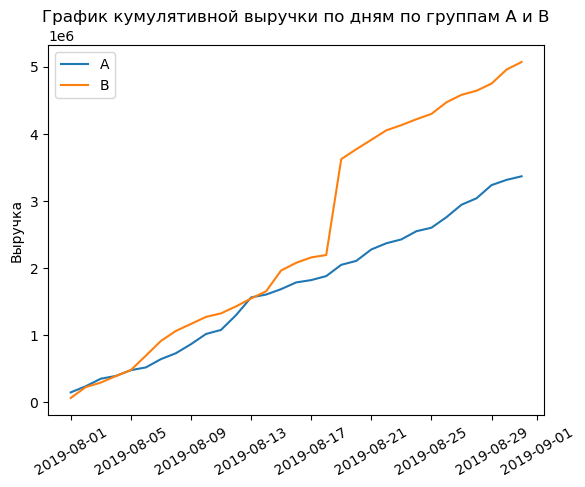

In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# cтроим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# cтроим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('График кумулятивной выручки по дням по группам А и В')
plt.ylabel('Выручка')
plt.xticks(rotation=30)
plt.legend()
plt.show()

Группа В лидирует по накопленной выручке, при этом в середине теста наблюдается резкий скачок, который сигнализирует о аномально большом количестве заказов или о появлянии очень дорогих заказов. Выручка группы А равномерно увеличивается в течениe теста.

#### Кумулятивный средний чек по группам

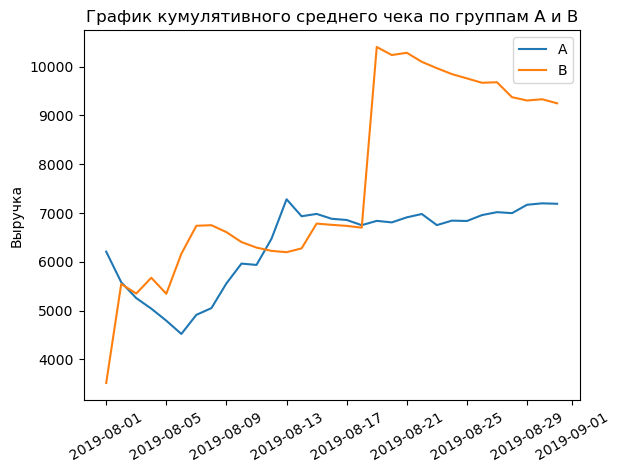

In [25]:
# разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'],
         label='A')

plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], 
         label='B')

plt.title('График кумулятивного среднего чека по группам А и В')
plt.ylabel('Выручка')
plt.xticks(rotation=30)
plt.legend()
plt.show()

Кумулятивные значения среднего чека для группы А установились к концу теста. У группы B наблюдается резкий скачок среднего чека в середине теста, видимо в этот период попали крупные заказы.

#### Относительное различие кумулятивного среднего чека по группам

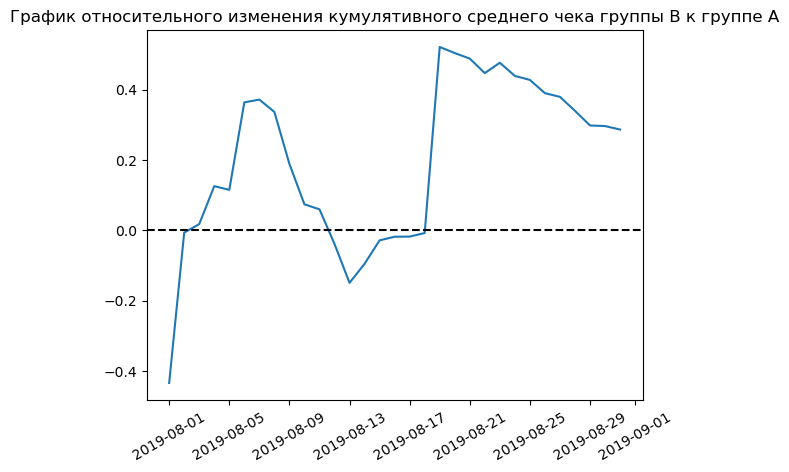

In [26]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b,
    left_on='date', right_on='date',
    how='left', suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])
         /(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=30)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

График резко скачет в нескольких точках, значит точно присутствуют крупные заказы и выбросы.

#### Кумулятивноe среднеe количество заказов на посетителя по группам

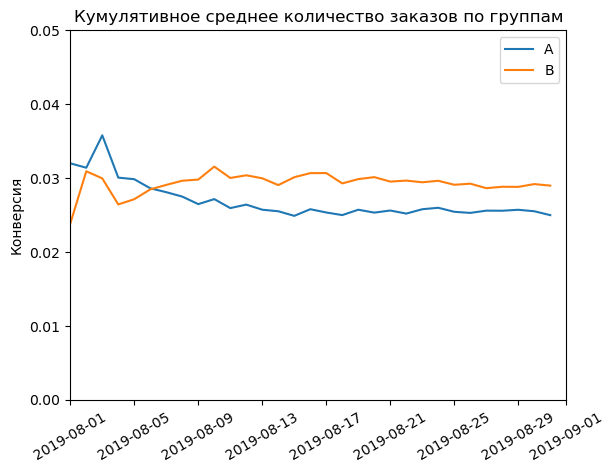

In [27]:
# считаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.title('Кумулятивное среднее количество заказов по группам')
plt.ylabel('Конверсия')
plt.xticks(rotation=30)
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.show()

Кумулятивное среднее количество заказов для двух групп выровнялось к концу теста. В среднем у группы B заказов больше.

#### Относительное изменениe кумулятивного среднего количества заказов на посетителя

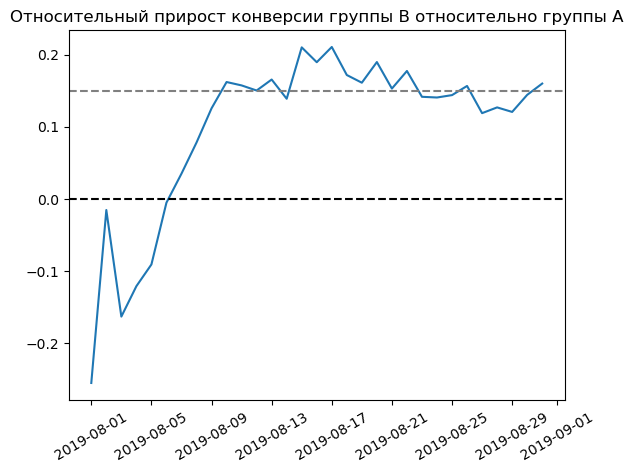

In [28]:
merged_cumulative_conversions = (
    cumulative_data_a[['date','conversion']]
    .merge(
        cumulative_data_b[['date','conversion']], 
        left_on='date', 
        right_on='date', 
        how='left', 
        suffixes=['_a', '_b']
    )
)
plt.plot(
    merged_cumulative_conversions['date'], 
    merged_cumulative_conversions['conversion_b']/
    merged_cumulative_conversions['conversion_a']-1
)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xticks(rotation=30)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.show()

В начале группа B проигрывала группе A, но потом вырвалась вперед и до конца теста оставалась больше, значения стабилизировались в районе 0.15.

### Анализ выбросов и всплесков

#### Распределение количества заказов по пользователям

In [29]:
#посмотрим на самое большое количество заказов
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns = ['user_id', 'orders']

orders_by_users.sort_values(by='orders', ascending=False).head(5)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


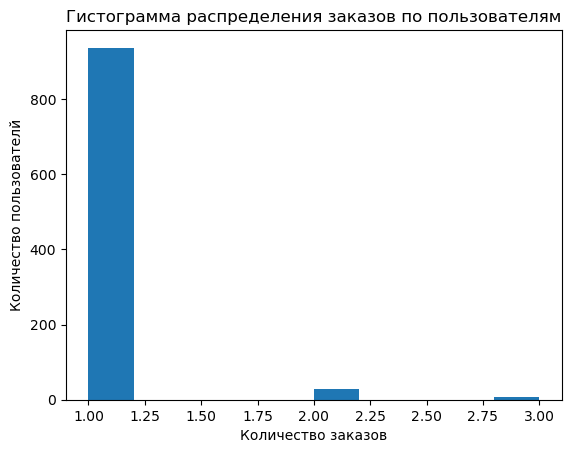

In [30]:
#гистограмма распределения заказов
plt.hist(orders_by_users['orders'])
plt.title('Гистограмма распределения заказов по пользователям')
plt.ylabel('Количество пользователй')
plt.xlabel('Количество заказов')
plt.show()

Большинство пользователей оформили один заказ за месяц, но есть небольшое количество пользователей, которые сделали 2 или 3 заказа.

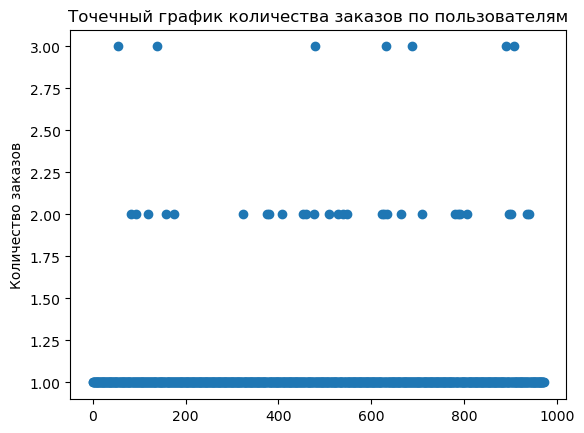

In [31]:
#построим точечный график количества заказов по пользователям
x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.show()

Точная доля пользователей с 2-3 заказами пока не ясна — непонятно, считать их аномалиями или нет.

In [32]:
# посчитаем выборочные перцентили количества заказов на одного пользователя
print(np.percentile(orders_by_users['orders'], [95, 99])) 

[1. 2.]


5% пользователей сделали больше 1 заказа, только 1% пользователей сделал больше 2 заказов. Верхней границей будем считать 2 заказа.

#### Распределение стоимостей заказов

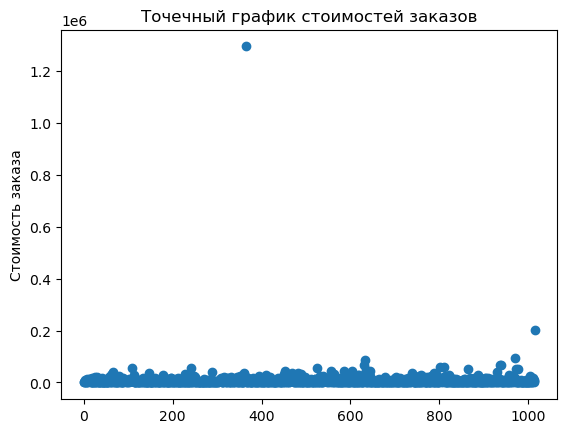

In [33]:
#построим точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders)))

plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.show()

Практически все заказы ниже 60 тысяч, но есть и более крупные заказы,один из них больше миллиона. 

In [34]:
# посчитаем выборочные перцентили стоимости заказов
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Только 5% пользователей сделали заказ больше чем на 27 тысяч, и 1% больше чем на 54 тысячи, возьмем это значение за верхнюю границу.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы 
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем количестве заказов между группами есть.

Для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни, уровень значимости возьмем стандартным 0.05.

In [35]:
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_daily_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_daily_b', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b']

data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,orders_daily_a,revenue_per_date_a,orders_daily_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Обозначение столбцов в таблице:
- date — дата
- orders_daily_a — количество заказов в выбранную дату в группе A
- revenue_per_date_a — суммарная выручка в выбранную дату в группе A
- orders_daily_a — количество заказов в выбранную дату в группе B
- revenue_per_date_a — суммарная выручка в выбранную дату в группе B
- orders_cummulative_a — суммарное число заказов до выбранной даты включительно в группе A
- revenue_cummulative_a — суммарная выручка до выбранной даты включительно в группе A
- orders_cummulative_b — суммарное количество заказов до выбранной даты включительно в группе B
- revenue_cummulative_b — суммарная выручка до выбранной даты включительно в группе B
- visitors_per_date_a — количество пользователей в выбранную дату в группе A
- visitors_per_date_b — количество пользователей в выбранную дату в группе B
- visitors_cummulative_a — количество пользователей до выбранной даты включительно в группе A
- visitors_cummulative_b — количество пользователей до выбранной даты включительно в группе B

Далее создадим переменные orders_by_users_a и orders_by_users_b, в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [36]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

Для подготовки к критериям Манна-Уитни объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [37]:
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_a'].sum() - 
                                          len(orders_by_users_a['orders'])), 
                          name='orders')],axis=0
                    )

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_b'].sum() - 
                                          len(orders_by_users_b['orders'])), 
                          name='orders')],axis=0
                    )

In [38]:
# функция для проверки гипотез
def testing_hypotheses(data_a, data_b, alpha):
    p_value = stats.mannwhitneyu(data_a, data_b)[1]
    print("p-value: {0:.3f}".format(p_value))
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу: нет оснований считать группы разными")
    
    print("Относительный прирост В к А: {0:.3%}".format(data_b.mean() / data_a.mean()-1))

In [39]:
testing_hypotheses(sample_a,sample_b, 0.05)

p-value: 0.011
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 15.980%


По "сырым" данным относительное различие в среднем количестве заказов между группами А и В есть. Значение p_value меньше 0.05, поэтому отвергаем нулевую гипотезу. Относительный выигрыш группы B равен 15.98%

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Проверим статистическую значимость различий в среднем чеке между группами. 
- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть. 

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. А ещё найдём относительные различия в среднем чеке между группами.

In [40]:
# используем функцию для проверки гипотез
testing_hypotheses(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], 0.05)

p-value: 0.829
Не получилось отвергнуть нулевую гипотезу: нет оснований считать группы разными
Относительный прирост В к А: 28.660%


P-value значительно больше 0.5, значит оснований отвергать нулевую гипотезу нет. Наблюдаемое различие выигрыша В к А в 28.66% не является статистически значимым.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил больше 4 заказов или совершил заказ дороже 58 тысяч рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% пользователей с дорогими заказами.

In [41]:
orders_lim = np.percentile(orders_by_users['orders'], 99)
revenue_lim = np.percentile(orders['revenue'], 99)

users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > orders_lim]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > orders_lim]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > revenue_lim]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormal_users.head(5))
display(f'Количество аномальных пользователей: {abnormal_users.shape[0]}') 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitor_id, dtype: int64

'Количество аномальных пользователей: 16'

Узнаем, как действия 16 аномальных пользователей повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [42]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Проверим те же гипотезы для "очищенных" данных:
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем количестве заказов между группами есть.

In [43]:
# применим статистический критерий Манна-Уитни к полученным выборкам
testing_hypotheses(sample_a_filtered, sample_b_filtered, 0.05)

p-value: 0.007
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 18.921%


Значением p-value меньшу статистической значимости, значит для "очищенных" данных есть разница между средним количеством заказов.  Выигрыш группы B составил 18.92%, что на 2.94% выше, чем у "сырых" данных.

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Проверим гипотезы для "очищенных" данных:
- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [44]:
testing_hypotheses(
    orders[(orders['group']=='A') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'], 
    orders[(orders['group']=='B') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'],
    0.05
)

p-value: 0.788
Не получилось отвергнуть нулевую гипотезу: нет оснований считать группы разными
Относительный прирост В к А: -3.234%


Относительный прирост В к А стал отрицательным, изменился более чем на 31% по сравнению с "сырыми" данными. Значение p-value больше статистической значимости, нет оснований отвергать нулевую гипотезу "различий в среднем чеке между группами нет", следовательно относительный прирост в -3.23% не является статистически значимым.

## Общий вывод

В результате выполнения проекта с использованием фреймворков ICE и RICE приоритезированы гипотезы для увеличения выручки интернет-магазина. Фреймворк RICE учитывает количество пользователей, которых коснется изменение, поэтому является наиболее показательным. Наиболее приоритетными гипотезами по RICE являются: 
- "добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассыло"; 
- "добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа".
Также стоит обратить внимание на эти две гипотезы:
- "добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"; 
- "показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".

В результате анализа результатов A/B тесты сформулированы следующие выводы:
- во время предобработки данных было выявлено, что более 5% пользователей попали сразу в обе группы;
- по "сырым" и "очищенным" данным статистически значимое различие между средним количеством заказов на посетителя для групп А и В есть. Конверсия группы B выигрывает и составляет около 16%;
- по "сырым" и "очищенным" данным статистической значимости различий в среднем чеке заказа между группами нет;
- можно остановить тест и признать победу по конверсии группы В.